In [187]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [188]:
df = pd.read_csv("churn.csv")

In [189]:
df.shape

(7043, 21)

In [190]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [191]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [193]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


C:\Users\A Madhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

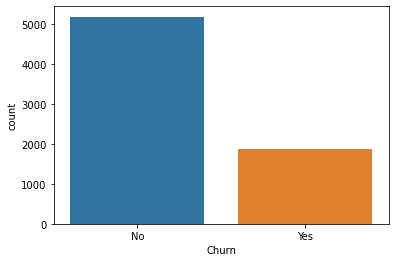

In [194]:
sns.countplot(df['Churn'])

<AxesSubplot:xlabel='gender', ylabel='count'>

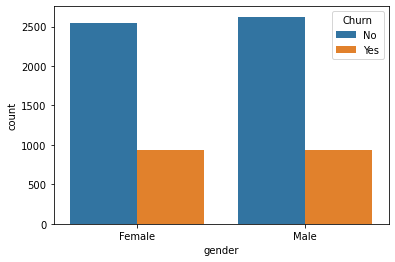

In [195]:
sns.countplot(x ='gender', hue='Churn', data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

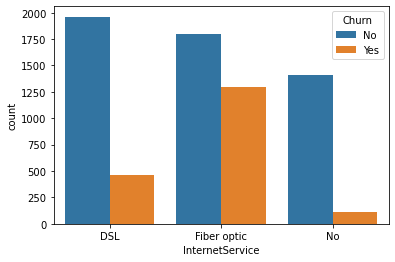

In [196]:
sns.countplot(x='InternetService', hue='Churn', data=df)

In [197]:
from sklearn import preprocessing

In [198]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Choose your gender'.
df['InternetService']= label_encoder.fit_transform(df['InternetService'])

In [199]:
df['TotalCharges']= label_encoder.fit_transform(df['TotalCharges'])

In [200]:
df['PaymentMethod']= label_encoder.fit_transform(df['PaymentMethod'])

In [201]:
df['PaperlessBilling']= label_encoder.fit_transform(df['PaperlessBilling'])

In [202]:
df['Contract']= label_encoder.fit_transform(df['Contract'])

In [203]:
df['StreamingMovies']= label_encoder.fit_transform(df['StreamingMovies'])

In [204]:
df['StreamingTV']= label_encoder.fit_transform(df['StreamingTV'])

In [205]:
df['TechSupport']= label_encoder.fit_transform(df['TechSupport'])

In [206]:
df['DeviceProtection']= label_encoder.fit_transform(df['DeviceProtection'])

In [207]:
df['OnlineBackup']= label_encoder.fit_transform(df['OnlineBackup'])

In [208]:
df['OnlineSecurity']= label_encoder.fit_transform(df['OnlineSecurity'])

In [209]:
df['Churn']= label_encoder.fit_transform(df['Churn'])

In [210]:
df['MultipleLines']= label_encoder.fit_transform(df['MultipleLines'])

In [211]:
df['PhoneService']= label_encoder.fit_transform(df['PhoneService'])

In [212]:
df['Dependents']= label_encoder.fit_transform(df['Dependents'])

In [213]:
df['Partner']= label_encoder.fit_transform(df['Partner'])

In [214]:
df['gender']= label_encoder.fit_transform(df['gender'])

In [215]:
df['customerID']= label_encoder.fit_transform(df['customerID'])

In [216]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range


In [217]:
lowage,uppage=remove_outlier(df['tenure'])
df["tenure"]=np.where(df['tenure']>uppage,uppage,df['tenure'])
df["tenure"]=np.where(df['tenure']<lowage,lowage,df['tenure'])

In [218]:
lowage,uppage=remove_outlier(df['MonthlyCharges'])
df["MonthlyCharges"]=np.where(df['MonthlyCharges']>uppage,uppage,df['MonthlyCharges'])
df["MonthlyCharges"]=np.where(df['MonthlyCharges']<lowage,lowage,df['MonthlyCharges'])

In [219]:
lowage,uppage=remove_outlier(df['TotalCharges'])
df["TotalCharges"]=np.where(df['TotalCharges']>uppage,uppage,df['TotalCharges'])
df["TotalCharges"]=np.where(df['TotalCharges']<lowage,lowage,df['TotalCharges'])

In [220]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


In [221]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [222]:
x=df.drop(["Churn"],axis=1)
y=df["Churn"]

In [223]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=70)

In [224]:
model = LogisticRegression()
# Train the model
model.fit(xtrain, ytrain)

C:\Users\A Madhu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [225]:
model.score(xtrain,ytrain)

0.8003194888178914

In [226]:
model.score(xtest,ytest)

0.7863733144073811

In [227]:
from sklearn import metrics
predictions=model.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,predictions)

array([[898, 119],
       [182, 210]], dtype=int64)

<AxesSubplot:>

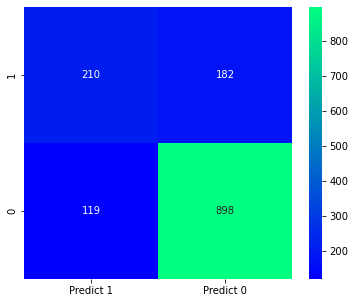

In [228]:
cm=metrics.confusion_matrix(ytest, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True,fmt='g',cmap='winter')

In [229]:
metrics.accuracy_score(ytest,predictions)

0.7863733144073811

In [230]:
metrics.recall_score(ytest,predictions,average='micro')

0.7863733144073811

In [231]:
metrics.precision_score(ytest,predictions,average='micro')

0.7863733144073811

In [232]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64